#  SNLS Colors from its catalog
======================================

- author : Sylvie Dagoret-Campagne
- date : March 22th 2018

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
#from regions import PixCoord, CircleSkyRegion, CirclePixelRegion, RectangleSkyRegion, RectanglePixelRegion

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Read file

In [5]:
df=pd.read_csv('SNLS_catD1D2D4.csv',index_col=0)

In [6]:
df.head()

,rag,decg,mxu,mxg,mxr,mxi,mxi2,mxz,data
0,36.385099,-4.996876,21.262462,19.131542,17.885551,16.976569,17.049769,16.583786,D1
1,36.532753,-4.996622,19.296211,18.510545,18.141572,17.993850,18.003495,17.936816,D1
2,36.093245,-4.992603,19.695154,17.795234,16.833046,16.417383,16.442505,16.220391,D1
3,36.473862,-4.992807,18.418090,17.413157,16.939017,16.754636,16.769276,16.675400,D1
4,36.546502,-4.994603,22.990037,20.823232,19.558416,18.027183,18.136777,17.385769,D1


In [7]:
df1=df[df.data=='D1']
df2=df[df.data=='D2']
df3=df[df.data=='D4']

# Make colors

In [8]:
df["u-g"]=df["mxu"]-df["mxg"]
df["g-r"]=df["mxg"]-df["mxr"]
df["r-i"]=df["mxr"]-df["mxi"]
df["i-z"]=df["mxi"]-df["mxz"]

In [9]:
df.head()

,rag,decg,mxu,mxg,mxr,mxi,mxi2,mxz,data,u-g,g-r,r-i,i-z
0,36.385099,-4.996876,21.262462,19.131542,17.885551,16.976569,17.049769,16.583786,D1,2.130920,1.245991,0.908982,0.392783
1,36.532753,-4.996622,19.296211,18.510545,18.141572,17.993850,18.003495,17.936816,D1,0.785666,0.368973,0.147722,0.057034
2,36.093245,-4.992603,19.695154,17.795234,16.833046,16.417383,16.442505,16.220391,D1,1.899920,0.962188,0.415663,0.196992
3,36.473862,-4.992807,18.418090,17.413157,16.939017,16.754636,16.769276,16.675400,D1,1.004933,0.474140,0.184380,0.079237
4,36.546502,-4.994603,22.990037,20.823232,19.558416,18.027183,18.136777,17.385769,D1,2.166805,1.264816,1.531233,0.641415


In [10]:
dfcoll=df.loc[:,["data","u-g","g-r","r-i","i-z"]]

In [11]:
dfcoll.head()

,data,u-g,g-r,r-i,i-z
0,D1,2.130920,1.245991,0.908982,0.392783
1,D1,0.785666,0.368973,0.147722,0.057034
2,D1,1.899920,0.962188,0.415663,0.196992
3,D1,1.004933,0.474140,0.184380,0.079237
4,D1,2.166805,1.264816,1.531233,0.641415


In [12]:
dfcoll1=dfcoll[dfcoll.data=='D1']
dfcoll2=dfcoll[dfcoll.data=='D2']
dfcoll3=dfcoll[dfcoll.data=='D4']

## Covariance matrix

In [13]:
dfcoll.cov()

,u-g,g-r,r-i,i-z
u-g,0.447037,0.234441,0.225961,0.092269
g-r,0.234441,0.169363,0.178378,0.073348
r-i,0.225961,0.178378,0.254053,0.102363
i-z,0.092269,0.073348,0.102363,0.044114


In [14]:
dfcoll1.cov()

,u-g,g-r,r-i,i-z
u-g,0.474669,0.266828,0.258377,0.107160
g-r,0.266828,0.189722,0.199040,0.083051
r-i,0.258377,0.199040,0.276818,0.112991
i-z,0.107160,0.083051,0.112991,0.048890


In [15]:
dfcoll2.cov()

,u-g,g-r,r-i,i-z
u-g,0.461726,0.246263,0.243370,0.100585
g-r,0.246263,0.162573,0.170871,0.070992
r-i,0.243370,0.170871,0.248524,0.101225
i-z,0.100585,0.070992,0.101225,0.043532


In [16]:
dfcoll3.cov()

,u-g,g-r,r-i,i-z
u-g,0.409515,0.207315,0.195599,0.078903
g-r,0.207315,0.162343,0.172088,0.069858
r-i,0.195599,0.172088,0.245568,0.097678
i-z,0.078903,0.069858,0.097678,0.042094


## Correlation matrix

In [17]:
dfcoll.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.852024,0.670502,0.657047
g-r,0.852024,1.000000,0.859940,0.848575
r-i,0.670502,0.859940,1.000000,0.966922
i-z,0.657047,0.848575,0.966922,1.000000


In [18]:
dfcoll1.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.889153,0.712789,0.703437
g-r,0.889153,1.000000,0.868532,0.862335
r-i,0.712789,0.868532,1.000000,0.971257
i-z,0.703437,0.862335,0.971257,1.000000


In [19]:
dfcoll2.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.898839,0.718442,0.709477
g-r,0.898839,1.000000,0.850079,0.843879
r-i,0.718442,0.850079,1.000000,0.973198
i-z,0.709477,0.843879,0.973198,1.000000


In [20]:
dfcoll3.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.804042,0.616803,0.600967
g-r,0.804042,1.000000,0.861883,0.845067
r-i,0.616803,0.861883,1.000000,0.960730
i-z,0.600967,0.845067,0.960730,1.000000


## Plots

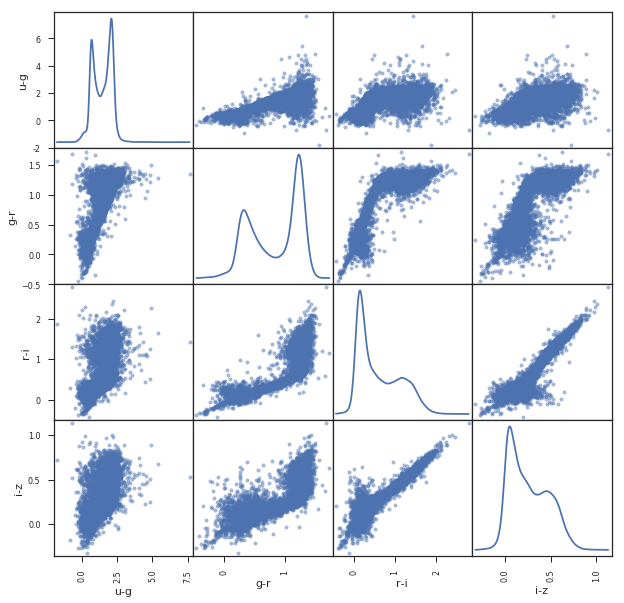

In [37]:
#g=pd.scatter_matrix(dfcoll,diagonal="kde",grid=True,alpha=0.3,color='red',figsize=(8,8))
g=pd.scatter_matrix(dfcoll,diagonal="kde",figsize=(10,10))

In [22]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

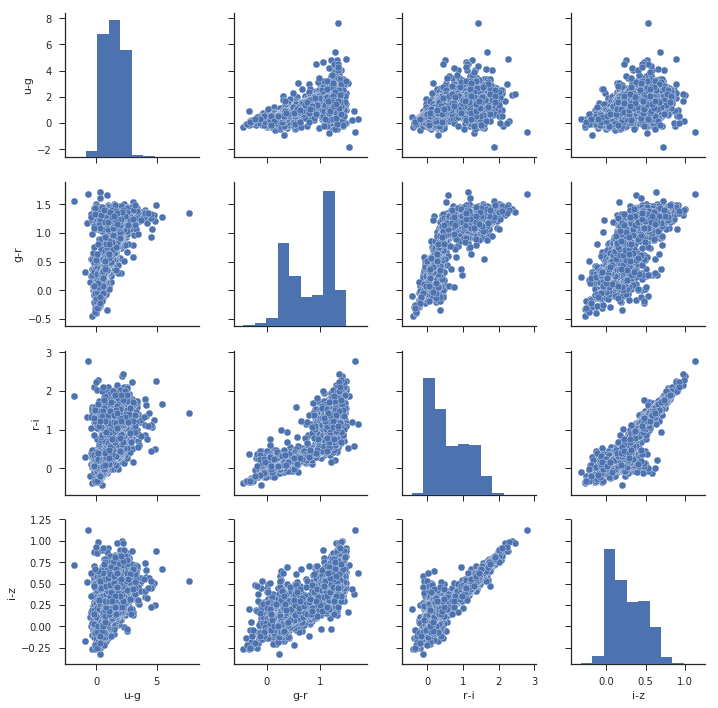

In [23]:
g = sns.pairplot(dfcoll)

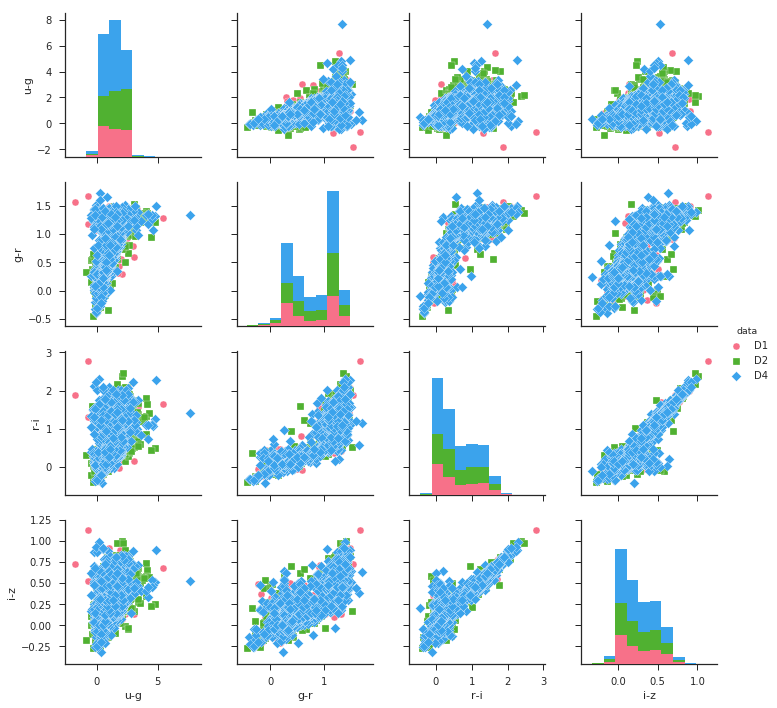

In [24]:
g = sns.pairplot(dfcoll, hue="data",palette="husl",markers=["o", "s", "D"])

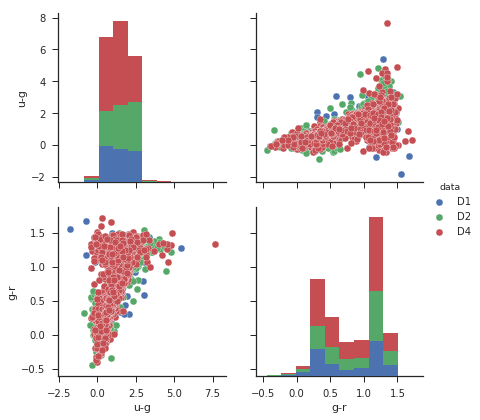

In [25]:
g = sns.pairplot(dfcoll, size=3, hue="data",
...                  vars=["u-g", "g-r"])

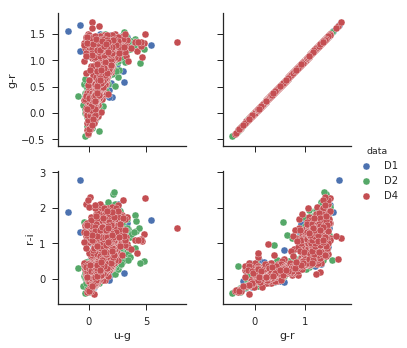

In [26]:
g = sns.pairplot(dfcoll,hue="data",
...                  x_vars=["u-g", "g-r"],
...                  y_vars=["g-r", "r-i"])

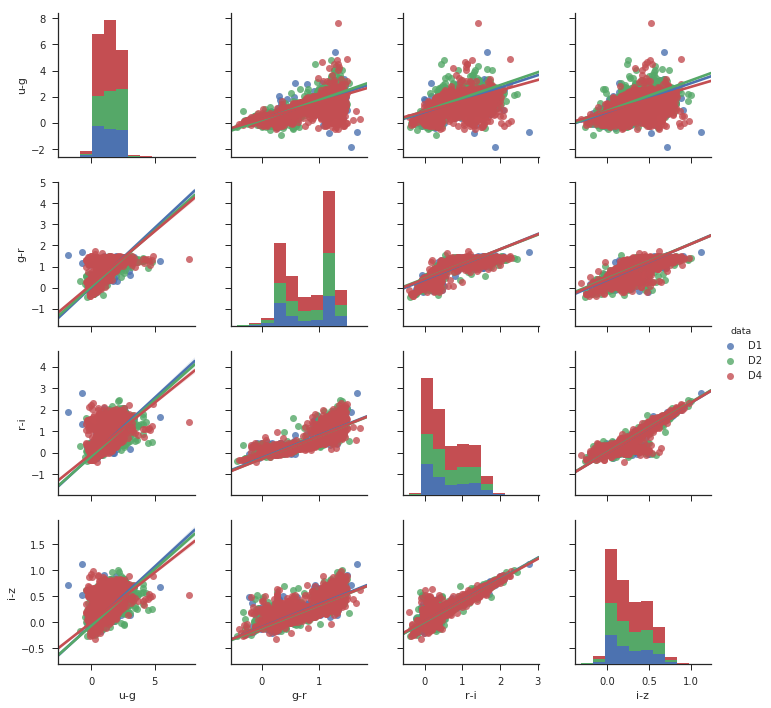

In [27]:
g = sns.pairplot(dfcoll, hue="data",kind="reg")

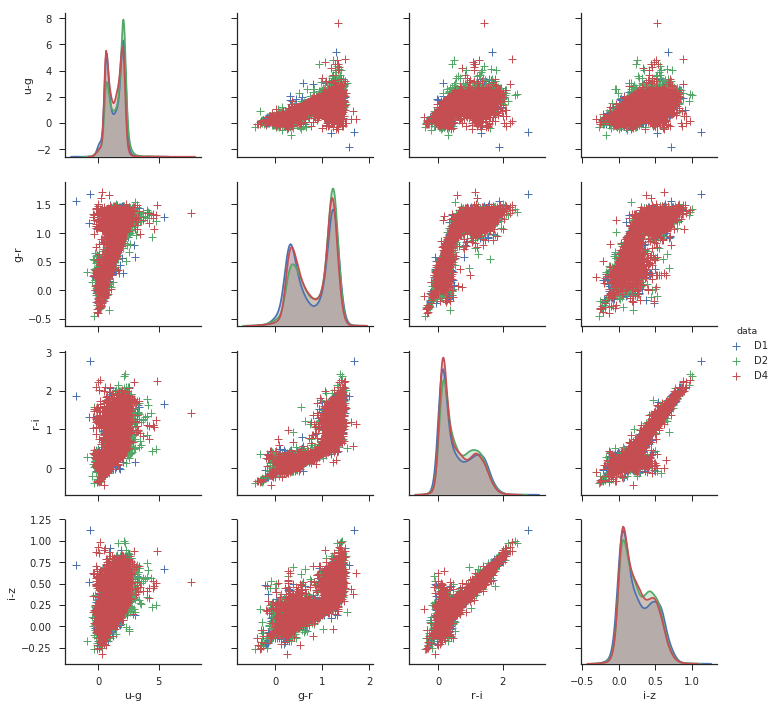

In [28]:
g = sns.pairplot(dfcoll, diag_kind="kde",markers="+",hue="data",
...                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
...                  diag_kws=dict(shade=True))

# Save in a file

In [29]:
dfcoll.to_csv('SNLS_col_D1D2D4.csv')